### Product Sales Analysis Using Python

#### About The DataSet

The dataset consists of 12 files which is related to sales for each month of 2019.This dataset contain various details of Products Sold / Purchase by month, product type, cost, purchase address, etc.

#### Objective of This Data Analysis

The objective of this Analysis as follow:-
1) To find out the patterns in selling structure,
2) Most demanding product,
3) The best selling month for the Sale,
4) The best time to advertisements to increase Sale or buying products,
5) Most busy city to sold the product.
6) And visualise them to obtain important information about the product sales

#### STEP 1 - Importing Necessary Python Libraries

In [1]:
import pandas as pd # for the data processing,CSV file reading and Data cleaning
import numpy as np # for the N-dimensional array and linear algebra
import seaborn as sns # For the visualization of data set
import matplotlib.pyplot as plt # for the visualization of data set
import plotly.express as px # to visualize a variety of types of data
from datetime import datetime

In [2]:
from plotly.offline import iplot # to display the plot when working on offline 
import plotly
plotly.offline.init_notebook_mode(connected=True)
# for the export plotly graph in svg or jpg format

#### STEP 2 - Loading Dataset and making single Dataset/DataFrame

*  Reading all the 12 file and merging all file in single data frame. 

In [3]:
jan=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_January_2019.csv")
feb=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_February_2019.csv")
mar=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_March_2019.csv")
apr=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_April_2019.csv")
may=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_May_2019.csv")
june=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_June_2019.csv")
july=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_July_2019.csv")
aug=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_August_2019.csv")
sep=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_September_2019.csv")
octo=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_October_2019.csv")
nov=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_November_2019.csv")
dec=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Choice-Data/Sales_Data/Sales_December_2019.csv")

In [4]:
jan["Month"]="Jan"
feb["Month"]="Feb"
mar["Month"]="March"
apr["Month"]="Apr"
may["Month"]="May"
june["Month"]="June"
july["Month"]="July"
aug["Month"]="Aug"
sep["Month"]="Sep"
octo["Month"]="Oct"
nov["Month"]="Nov"
dec["Month"]="Dec"

In [5]:
#Now concatenating the all  data in one DataFrame called as df
df = pd.concat([jan,feb,mar,apr,may,june,july,aug,sep,octo,nov,dec],axis=0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan


Following are the meaning of column which shown in above Dataset

* **Order ID** - This is the unique number identifier that gets generated when we place an order. which is use to keep track of orders. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
* **Product** - The product that have been sold.
* **Quantity Ordered** - Ordered Quantity is the total item quantity ordered.
* **Price Each** - The price of each products.
* **Order Date** - This is the date on which the customer is requesting the order to be shipped.
* **Purchase Address** -This is the location where the customer would like his purchased items delivered.

#### STEP 3 - Handing Missing Value

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month                 0
dtype: int64

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
Month               0.000000
dtype: float64

In [8]:
# by checking the above details Looks like the percent missing of the data is not too big.
df = df.dropna()
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

* in the data set there are columns in which values in rows are the same as the header. so now droping this row from dataset

In [9]:
df['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [10]:
df.shape

(186305, 7)

In [11]:
#create filter to drop text values
filter_repeated_values = df['Quantity Ordered'] != 'Quantity Ordered'

#replace data without text values in quality ordered
df = df[filter_repeated_values]

In [12]:
df['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

#### STEP 4 - Basic Descriptions of the Data 

In [13]:
df.shape

(185950, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


* **As we see from the info the data type of column are object so converting data type of column**

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Purchase Address'] = df['Purchase Address'].astype('str')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Order ID'] = df['Order ID'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')

In [16]:
# after converting data type now checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,185950.0,230417.569379,51512.737110,141234.00,185831.25,230367.50,275035.75,319670.0
Quantity Ordered,185950.0,1.124383,0.442793,1.00,1.00,1.00,1.00,9.0
Price Each,185950.0,184.399735,332.731330,2.99,11.95,14.95,150.00,1700.0


#### STEP 5 - Data preparation for the analysis work
* **Adding Month, City, Total Sale and Time Column**

In [18]:
df['City'] = df['Purchase Address'].str.split(',').str[1].astype(str)
df['Total Sale'] = df['Quantity Ordered']* df['Price Each']
# Also creating the new column of time for the analysis part of which was time is good for the advertisement
df['Time'] = df['Order Date'].dt.hour

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sale,Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,Boston,700.00,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,Portland,14.95,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,San Francisco,23.98,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,Los Angeles,149.99,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,Austin,11.99,11


###                                        Sales Data Analysis

#### **Q.1:- What was the best month for sales and why?**

In [20]:
monthly_Product_sales = df[['Total Sale', 'Month', 'Product']].groupby(['Month', 'Product']).sum().reset_index()
monthly_Product_sales

,Month,Product,Total Sale
0,Apr,20in Monitor,43446.05
1,Apr,27in 4K Gaming Monitor,220344.35
2,Apr,27in FHD Monitor,110542.63
3,Apr,34in Ultrawide Monitor,248133.47
4,Apr,AA Batteries (4-pack),10836.48
...,...,...,...
223,Sep,ThinkPad Laptop,248997.51
224,Sep,USB-C Charging Cable,19048.30
225,Sep,Vareebadd Phone,50400.00
226,Sep,Wired Headphones,15610.98


In [21]:
monthly_sales = df[['Month','Total Sale']].groupby('Month').sum().sort_values(by=['Total Sale'],ascending=False).reset_index()
monthly_sales

,Month,Total Sale
0,Dec,4619297.12
1,Oct,3736884.05
2,Apr,3396059.11
3,Nov,3198909.23
4,May,3144584.80
5,March,2809063.30
6,July,2646899.69
7,June,2578293.30
8,Aug,2244412.31
9,Feb,2203481.24


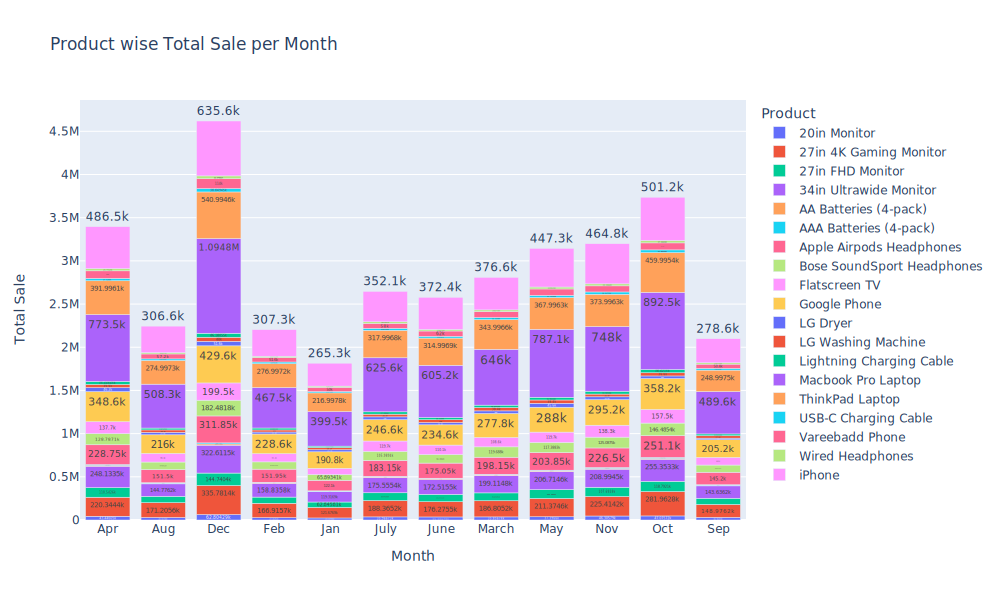

In [22]:
fig = px.bar(monthly_Product_sales, x='Month', y='Total Sale', color='Product',title="Product wise Total Sale per Month",
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

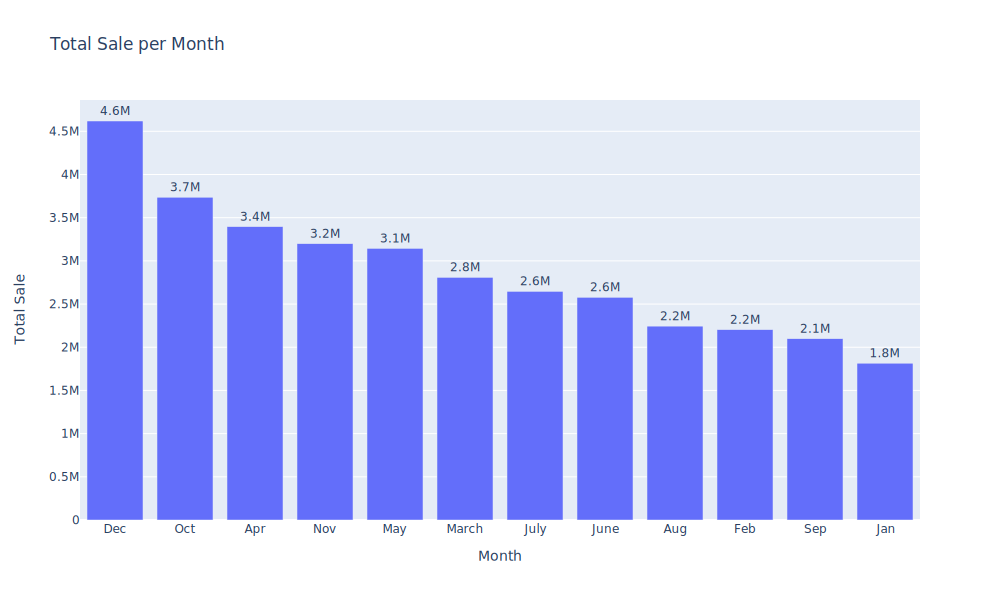

In [23]:
fig = px.bar(monthly_sales, x='Month',y='Total Sale',text_auto='.2s',title="Total Sale per Month")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

####  Conclusion for question-1    
1) The **best month to sell** is shown in the visualization above is **December** which has a record number of sales approximate to  **4.62 Million Dollars.**      
2) This **may be because in December there is Christmas,New Year Celebration and Holidays** where many people buy gifts for loved ones.

#### **Q.2:- Which city sold the most product?**

In [24]:
City_sales = df[['City','Quantity Ordered','Total Sale', ]].groupby(['City']).sum().reset_index()
City_sales.rename(columns={'Quantity Ordered': 'Number of Sales'}, inplace=True)
City_sales

,City,Number of Sales,Total Sale
0,Atlanta,16602,2795498.58
1,Austin,11153,1819581.75
2,Boston,22528,3661642.01
3,Dallas,16730,2767975.40
4,Los Angeles,33289,5452570.80
5,New York City,27932,4664317.43
6,Portland,14053,2320490.61
7,San Francisco,50239,8262203.91
8,Seattle,16553,2747755.48


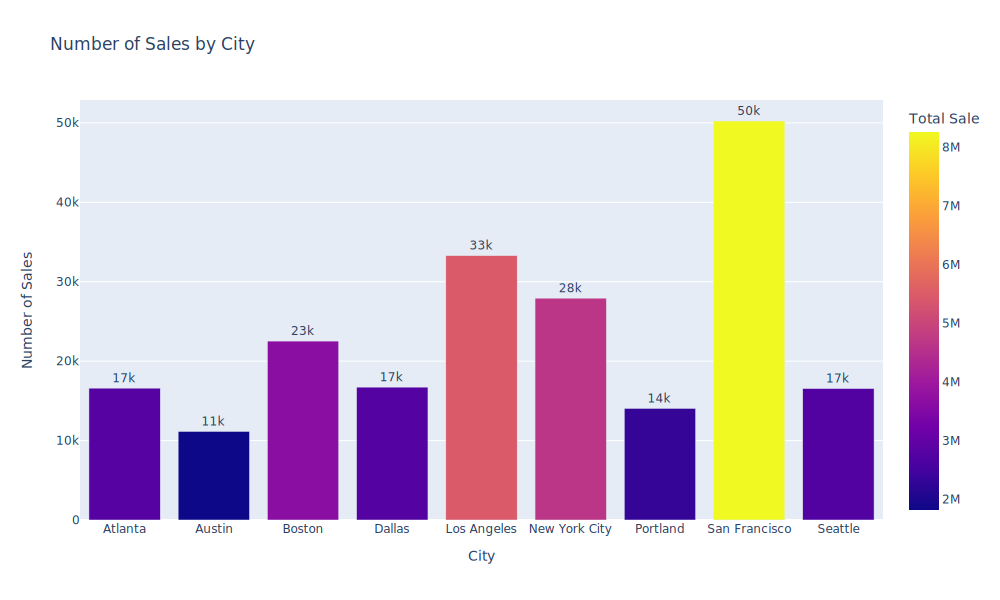

In [25]:
fig = px.bar(City_sales, 'City', 'Number of Sales', color='Total Sale',text_auto='.2s',title="Number of Sales by City")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

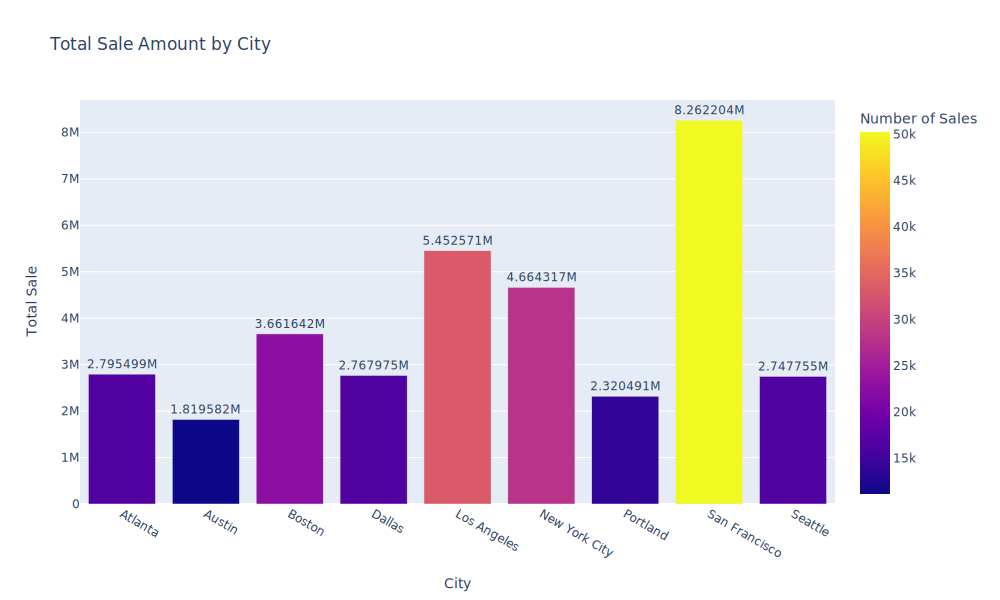

In [26]:
fig = px.bar(City_sales, 'City', 'Total Sale', color='Number of Sales',text_auto=True,title="Total Sale Amount by City",)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

#### Conclusion for question -2  
From the above visulaization here we can conclude that **San Francisco** had the highest **Number of sales quantity** which is **50,239** and **Total Sale** value is approximately **8.26 Million Dollars.**
      

#### **Q.3:-What time should we display advertisements to maximize likelihood of customer’s buying products and why?**

In [27]:
Hourly_sales = pd.concat([df.groupby(['Time']).count()['Quantity Ordered'],
                          df.groupby(['Time']).sum()[['Total Sale']]], axis=1).reset_index()
Hourly_sales

,Time,Quantity Ordered,Total Sale
0,0,3910,713721.27
1,1,2350,460866.88
2,2,1243,234851.44
3,3,831,145757.89
4,4,854,162661.01
5,5,1321,230679.82
6,6,2482,448113.00
7,7,4011,744854.12
8,8,6256,1192348.97
9,9,8748,1639030.58


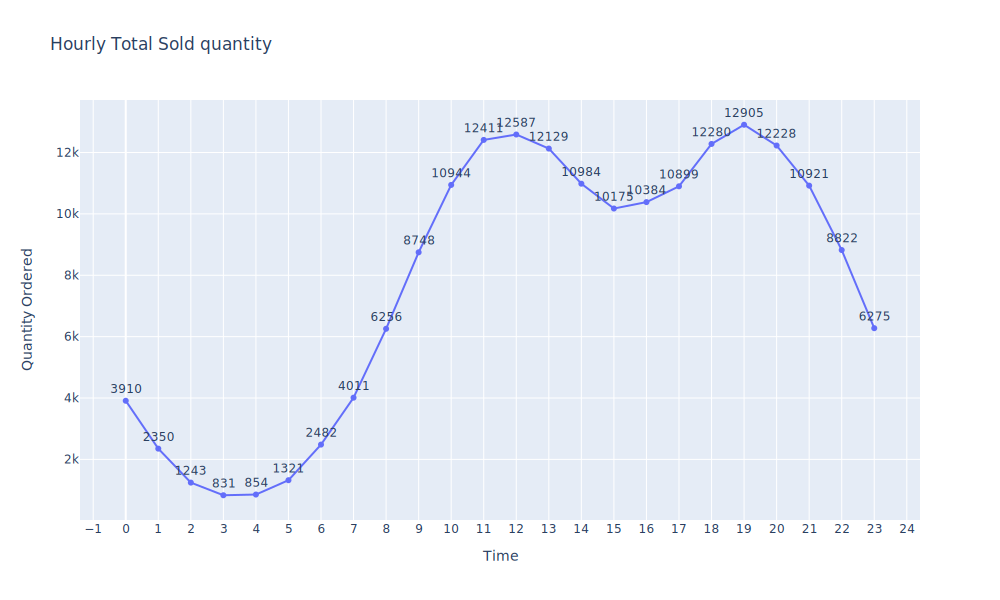

In [28]:
fig = px.line(Hourly_sales, x = 'Time', y ='Quantity Ordered', title="Hourly Total Sold quantity",markers=True,
              text='Quantity Ordered')
fig.update_layout(xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 1))
fig.update_traces(textposition = "top center")
fig.update_layout(width=1000, height=600)

fig.show("svg")

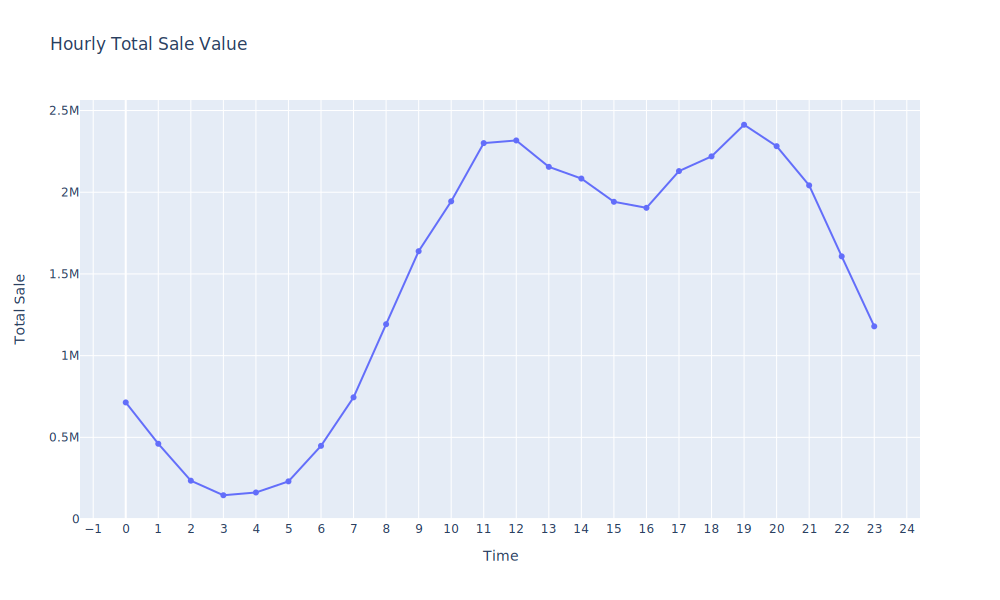

In [29]:
fig = px.line(Hourly_sales, x = 'Time', y ='Total Sale', title="Hourly Total Sale Value",markers=True)
fig.update_layout(xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 1))
fig.update_layout(width=1000, height=600)

fig.show("svg")

#### Conclusion for question -3  
From the above visulaization it can be **concluded** that during **10 AM to 1 PM and 5 PM to 9 PM**, received a maximum number of orders and it is **probably the best time to show advertisements to maximize the product selling.**
      

#### **Q.4:-Which product sold the most? Why do you think it did?**

In [30]:
product_sold = pd.merge(df.groupby('Product')['Price Each'].mean(), 
                    df.groupby('Product')['Quantity Ordered'].sum(), 
                    left_index=True,
                    right_index=True).reset_index()

product_sold['Total Revenue'] = product_sold['Price Each'] * product_sold['Quantity Ordered']
product_sold.sort_values(by='Quantity Ordered', ascending=False)

,Product,Price Each,Quantity Ordered,Total Revenue
5,AAA Batteries (4-pack),2.99,31017,92740.83
4,AA Batteries (4-pack),3.84,27635,106118.40
15,USB-C Charging Cable,11.95,23975,286501.25
12,Lightning Charging Cable,14.95,23217,347094.15
17,Wired Headphones,11.99,20557,246478.43
6,Apple Airpods Headphones,150.00,15661,2349150.00
7,Bose SoundSport Headphones,99.99,13457,1345565.43
2,27in FHD Monitor,149.99,7550,1132424.50
18,iPhone,700.00,6849,4794300.00
1,27in 4K Gaming Monitor,389.99,6244,2435097.56


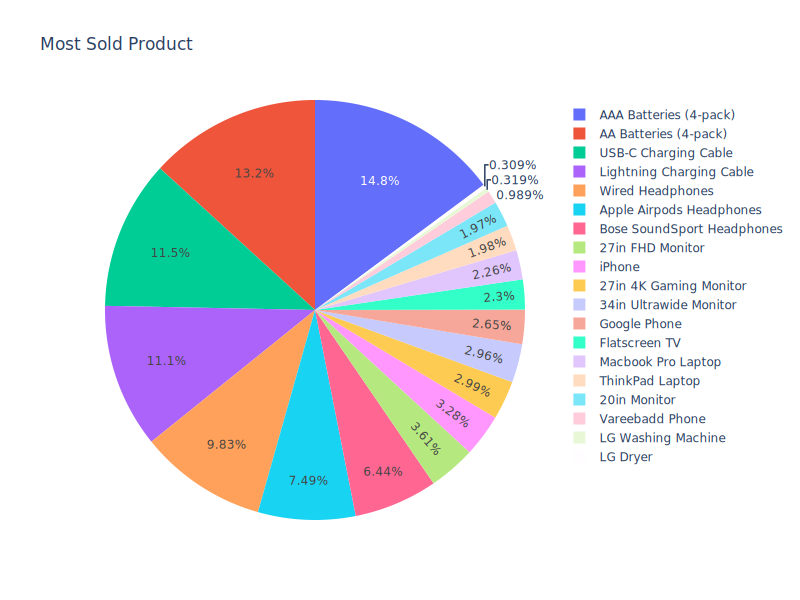

In [31]:
fig = px.pie(product_sold, values='Quantity Ordered', names='Product', title='Most Sold Product')
fig.update_layout(width=800, height=600)
fig.show("svg")

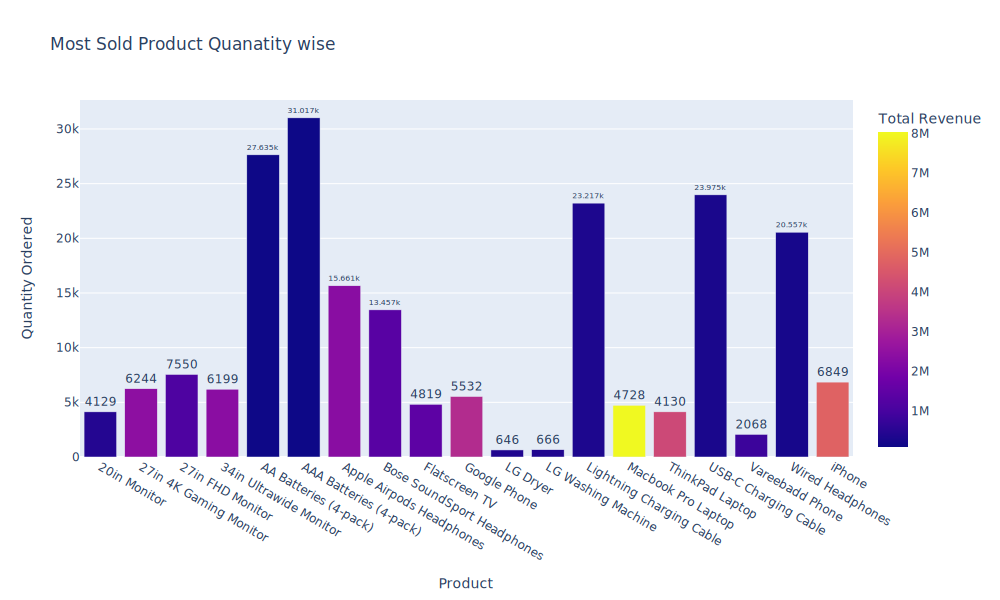

In [32]:
fig = px.bar(product_sold, 'Product', 'Quantity Ordered', color='Total Revenue',text_auto=True,
             title="Most Sold Product Quanatity wise",)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

#### Conclusion for question -4
1) The **most sold products** are **AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones.**      
2) This is because the **prices** of the most **ordered products** have a **low price** compared to other products.       
3) Also it can be concluded that the selling of a product depends on its price. The more expensive the product, the lower will be the quantity ordered and vice versa.

In [33]:
monthly_Product_sale = df[['Quantity Ordered', 'Month', 'Product']].groupby(['Month', 'Product']).count().reset_index()
monthly_Product_sale

,Month,Product,Quantity Ordered
0,Apr,20in Monitor,390
1,Apr,27in 4K Gaming Monitor,563
2,Apr,27in FHD Monitor,734
3,Apr,34in Ultrawide Monitor,650
4,Apr,AA Batteries (4-pack),2063
...,...,...,...
223,Sep,ThinkPad Laptop,249
224,Sep,USB-C Charging Cable,1454
225,Sep,Vareebadd Phone,126
226,Sep,Wired Headphones,1175


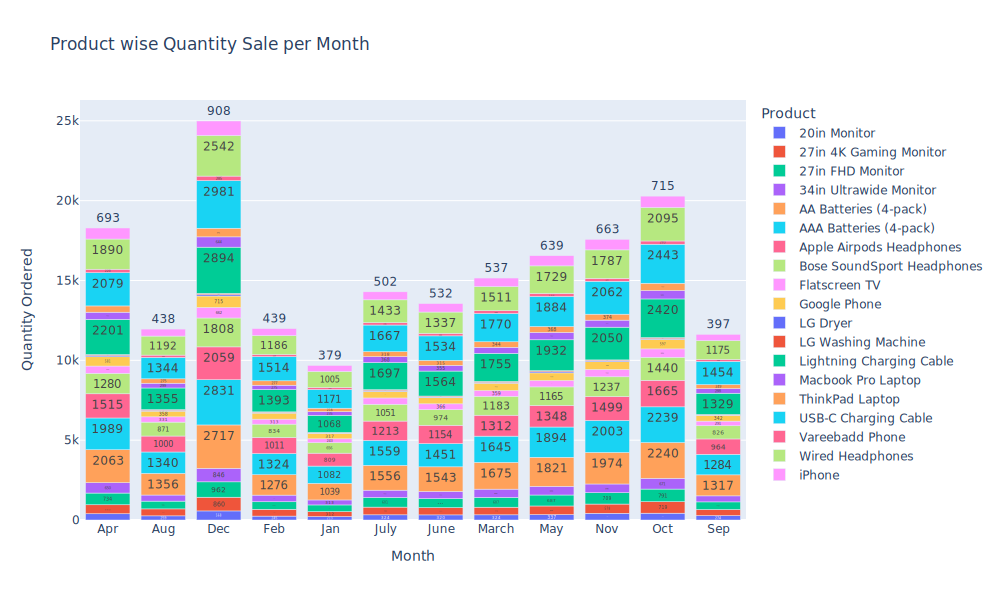

In [34]:
fig = px.bar(monthly_Product_sale, x='Month', y='Quantity Ordered', color='Product',
             title="Product wise Quantity Sale per Month",text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

In [35]:
City_sales_P = df[['City','Product','Quantity Ordered','Total Sale', ]].groupby(['City','Product']).sum().reset_index()
City_sales_P.rename(columns={'Quantity Ordered': 'Number of Sales'}, inplace=True)
City_sales_P

,City,Product,Number of Sales,Total Sale
0,Atlanta,20in Monitor,342,37616.58
1,Atlanta,27in 4K Gaming Monitor,493,192265.07
2,Atlanta,27in FHD Monitor,588,88194.12
3,Atlanta,34in Ultrawide Monitor,482,183155.18
4,Atlanta,AA Batteries (4-pack),2193,8421.12
...,...,...,...,...
166,Seattle,ThinkPad Laptop,333,332996.67
167,Seattle,USB-C Charging Cable,1869,22334.55
168,Seattle,Vareebadd Phone,179,71600.00
169,Seattle,Wired Headphones,1652,19807.48


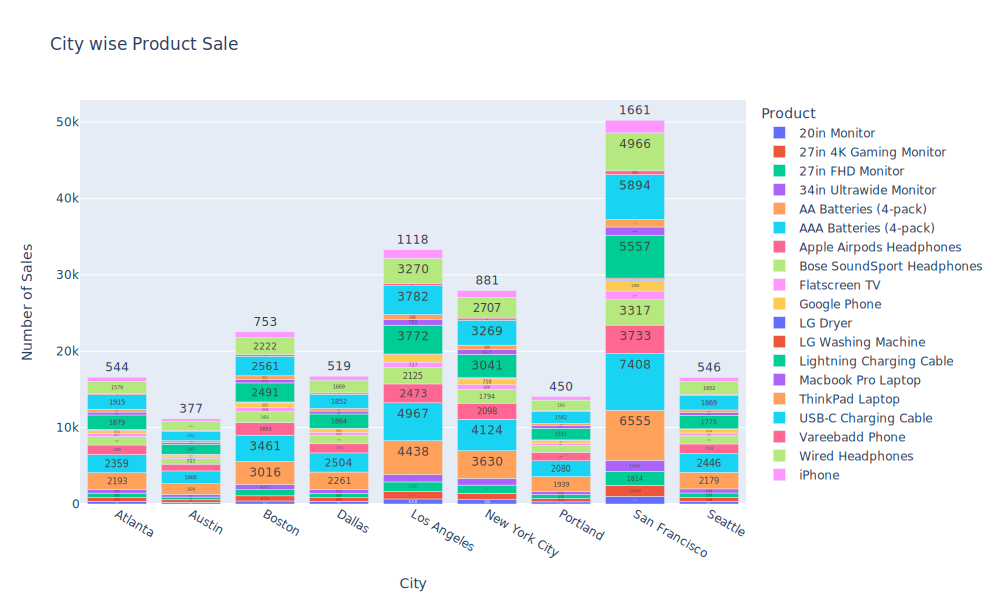

In [36]:
fig = px.bar(City_sales_P, x='City', y='Number of Sales', color='Product',title="City wise Product Sale",text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

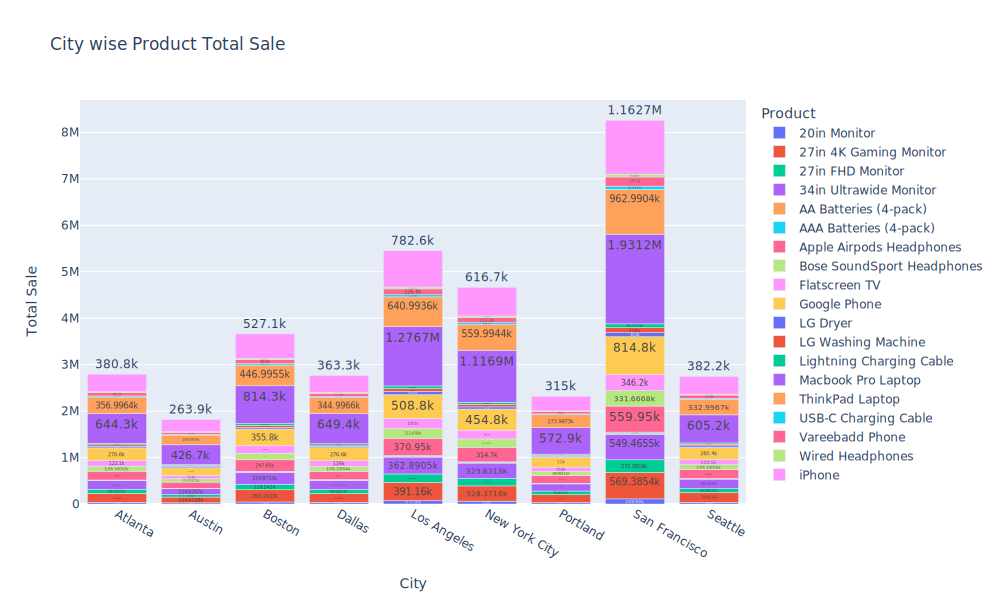

In [37]:
fig = px.bar(City_sales_P, x='City', y='Total Sale', color='Product',title="City wise Product Total Sale",text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=1000, height=600)

fig.show("svg")

In [38]:
time_sales_P = df[['Product','Time','Quantity Ordered','Total Sale', ]].groupby(['Product','Time']).sum().reset_index()
time_sales_P.rename(columns={'Quantity Ordered': 'Number of Sales'}, inplace=True)
time_sales_P

,Product,Time,Number of Sales,Total Sale
0,20in Monitor,0,87,9569.13
1,20in Monitor,1,42,4619.58
2,20in Monitor,2,38,4179.62
3,20in Monitor,3,15,1649.85
4,20in Monitor,4,17,1869.83
...,...,...,...,...
451,iPhone,19,465,325500.00
452,iPhone,20,472,330400.00
453,iPhone,21,394,275800.00
454,iPhone,22,329,230300.00


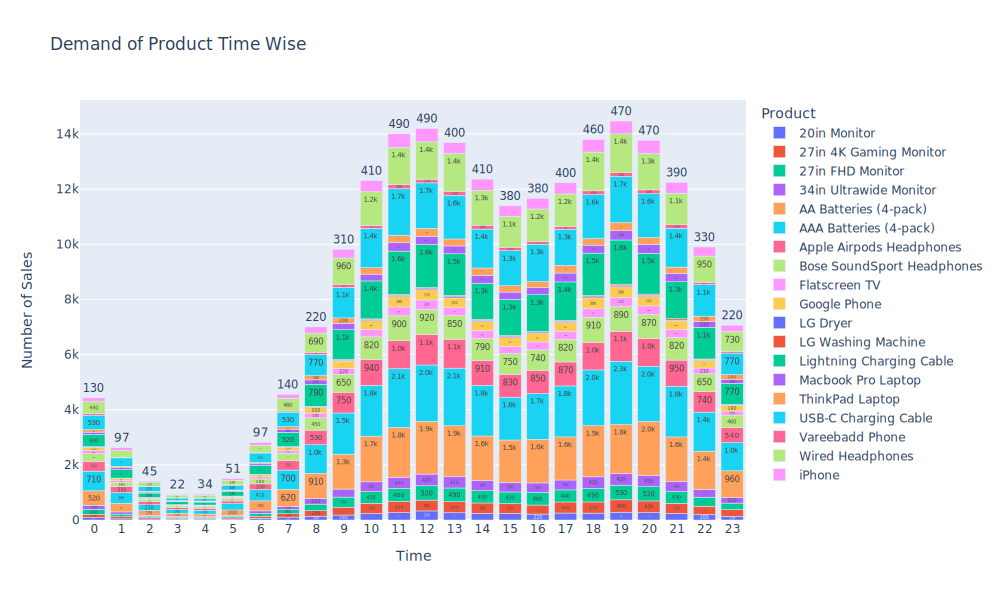

In [39]:
fig = px.bar(time_sales_P, x='Time',y='Number of Sales',text_auto='.2s',
             title="Demand of Product Time Wise",color='Product')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 1))
fig.update_layout(width=1000, height=600)

fig.show("svg")

In [40]:
time_sales_P_t = df[['City','Time','Quantity Ordered','Total Sale', ]].groupby(['City','Time']).sum().reset_index()
time_sales_P_t.rename(columns={'Quantity Ordered': 'Number of Sales'}, inplace=True)
time_sales_P_t

,City,Time,Number of Sales,Total Sale
0,Atlanta,0,357,62855.02
1,Atlanta,1,236,44443.32
2,Atlanta,2,117,25211.14
3,Atlanta,3,68,7018.49
4,Atlanta,4,88,18954.97
...,...,...,...,...
211,Seattle,19,1086,183817.61
212,Seattle,20,1119,168681.88
213,Seattle,21,969,171082.96
214,Seattle,22,785,136919.63


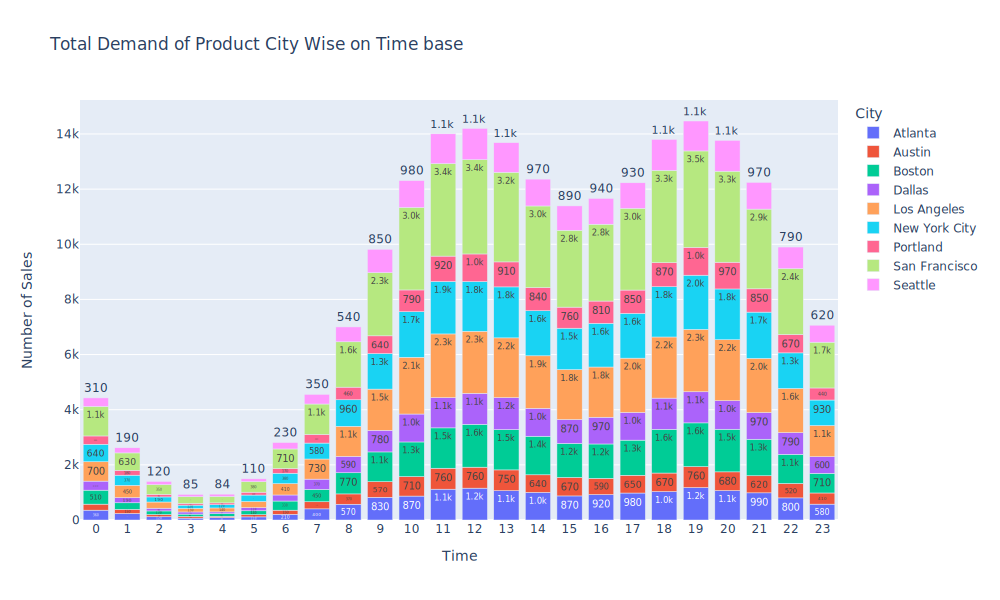

In [41]:
fig = px.bar(time_sales_P_t, x='Time',y='Number of Sales',text_auto='.2s',
             title="Total Demand of Product City Wise on Time base",color='City')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 1,))
fig.update_layout(width=1000, height=600)

fig.show("svg")